In [30]:
# Importando os módulos:
import pandas as pd
import folium
from folium import plugins, Map
import matplotlib.pyplot as plt
import numpy as np
from API_google import reverse_geocode
import seaborn as sns
import csv 
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [31]:
# Nova data frame com os dados tratados (rodar todas as vezes)
df= pd.read_csv(r"dataset_consumo_2.csv", delimiter=';', encoding='ANSI')

In [32]:
df['LATITUDE'] = df['LATITUDE'].str.replace(',','.')
df['LONGITUDE'] = df['LONGITUDE'].str.replace(',','.')

In [33]:
#Transformar o tipo das colunas para Categoria
df['RENDA'] = pd.Categorical(df['RENDA'])
df['CONSUMO'] = pd.Categorical(df['CONSUMO'])
df['IDADE'] = pd.Categorical(df['IDADE'])
df['LATITUDE'] = pd.Categorical(df['LATITUDE'])
df['LONGITUDE'] = pd.Categorical(df['LONGITUDE'])

In [34]:
#Codificando os dados categóricos
df['RENDA'] = df['RENDA'].cat.codes
df['CONSUMO'] = df['CONSUMO'].cat.codes
df['IDADE'] = df['IDADE'].cat.codes
df['LATITUDE'] = df['LATITUDE'].cat.codes
df['LONGITUDE'] = df['LONGITUDE'].cat.codes

In [41]:
code=df[['CONSUMO','RENDA','IDADE','LATITUDE','LONGITUDE']]
code

,CONSUMO,RENDA,IDADE,LATITUDE,LONGITUDE
0,17,0,19,7419,630
1,5,1,22,5675,4813
2,17,1,46,7445,1940
3,11,2,25,978,4518
4,11,2,43,1593,1832
...,...,...,...,...,...
9995,20,0,21,423,3910
9996,17,1,20,1079,4272
9997,17,2,24,8166,442
9998,2,2,15,-1,-1


In [ ]:
15,62 ; 1,14; 30,49; 7744,04; 855,82
15,50 ; 0,908 ; 31,11 ; 506,34 ; 539,79
15,59 ; 0,827 ; 33,88 ; 2652,25 ; 4255,63
15,50 ; 0,7475 ; 29,83 ; 6104,94 ; 6610,24

In [12]:
# Criação do modelo de Agrupamento (Clustering) usando K-Means
# Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans

KMeans(init='random', n_clusters=4)

In [14]:
# Treino do modelo com os Dados
kmeans.fit(code)

KMeans(init='random', n_clusters=4)

In [15]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[1.55135011e+01, 9.07551487e-01, 3.11185355e+01, 5.07854005e+02,
        5.42327689e+02],
       [1.56214789e+01, 1.14612676e+00, 3.04991197e+01, 7.74404225e+03,
        8.55820423e+02],
       [1.55045208e+01, 7.47558770e-01, 2.98379747e+01, 6.10494033e+03,
        6.61024485e+03],
       [1.55896781e+01, 8.28053143e-01, 3.38832397e+01, 2.65305851e+03,
        4.25707230e+03]])

In [17]:
# Treinando novamente o modelo com os Dados - Observe que novos Centroids são calculados (inicialização randômica!)
kmeans.fit(code)

KMeans(init='random', n_clusters=4)

In [18]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[1.56214789e+01, 1.14612676e+00, 3.04991197e+01, 7.74404225e+03,
        8.55820423e+02],
       [1.55925453e+01, 8.27418943e-01, 3.38833291e+01, 2.65225683e+03,
        4.25563671e+03],
       [1.55082493e+01, 9.08799267e-01, 3.11145738e+01, 5.06343721e+02,
        5.39797434e+02],
       [1.55045208e+01, 7.47558770e-01, 2.98379747e+01, 6.10494033e+03,
        6.61024485e+03]])

In [19]:
# Executa K-Means para agrupar os dados e retorna Tabela de Distancias (fit_transform)
# Calcula a distância entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(code)
distance

array([[ 395.95804511, 6913.25561106, 5988.93197499, 6122.92426107],
       [4465.46650725, 6706.37468442, 3073.74097103, 1848.00150529],
       [1124.77278796, 7078.54095063, 5322.84785679, 4858.72517918],
       ...,
       [ 591.05037848, 7660.28411211, 6704.12483169, 6503.47978798],
       [7792.31975998,  741.82400793, 5015.90177436, 8999.52608654],
       [7559.91670852, 4008.64782157, 1550.92131353, 5411.91970443]])

In [20]:
# Para cada uma das 100 linhas do dataset, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?
# São 100 elementos no array, um por linha
labels = kmeans.labels_
labels

array([0, 3, 0, ..., 0, 1, 2])

In [21]:
# Exibindo novamente os Centroids (atualizados) - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[1.56214789e+01, 1.14612676e+00, 3.04991197e+01, 7.74404225e+03,
        8.55820423e+02],
       [1.55082493e+01, 9.08799267e-01, 3.11145738e+01, 5.06343721e+02,
        5.39797434e+02],
       [1.55925453e+01, 8.27418943e-01, 3.38833291e+01, 2.65225683e+03,
        4.25563671e+03],
       [1.55045208e+01, 7.47558770e-01, 2.98379747e+01, 6.10494033e+03,
        6.61024485e+03]])

In [ ]:
15,62;1,14;30,49;7744,04;855,82
15,50;0,908;31,11;506,34;539,79
15,59;0,827;33,88;2652,25;4255,63
15,50;0,7475;29,83;6104,94;6610,24

In [22]:
code

,CONSUMO,RENDA,IDADE,LATITUDE,LONGITUDE
0,17,0,19,7419,630
1,5,1,22,5675,4813
2,17,1,46,7445,1940
3,11,2,25,978,4518
4,11,2,43,1593,1832
...,...,...,...,...,...
9995,20,0,21,423,3910
9996,17,1,20,1079,4272
9997,17,2,24,8166,442
9998,2,2,15,-1,-1


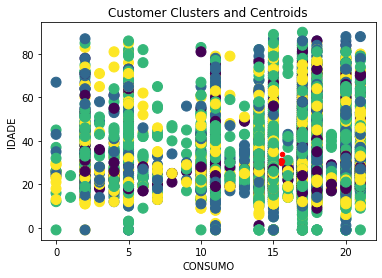

In [29]:
# Visualizando os Clusters - Exemplo 1
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(code.iloc[:, 0], code.iloc[:,2], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('CONSUMO')
plt.ylabel('IDADE')
plt.show()